## Team # 15

* Manuel Alemán Cueto A01794894
* Emmanuel Domínguez Bravo A01793683
* Alfonso Garibay Flores A01224167
* Zmaltzin Paola Godinez Juárez A01794538
* Luis Angel Hermenegildo Dominguez A01793625


# 10. Morphological Operations

## Table of Contents
1. [Libraries](#libraries)
2. [Erosion](#erosion)
3. [Dilation](#dilation)
4. [Opening](#opening)
5. [Closing](#closing)
6. [Morphological Gradient](#gradient)
7. [Morphological Hats](#hats)
   1. [Top or White Hat](#top)
   1. [Black Hat](#black)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread("data/image.jpg")
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("data/image.jpg",0)

(400, 700, 3) (400, 700, 3) (400, 700)


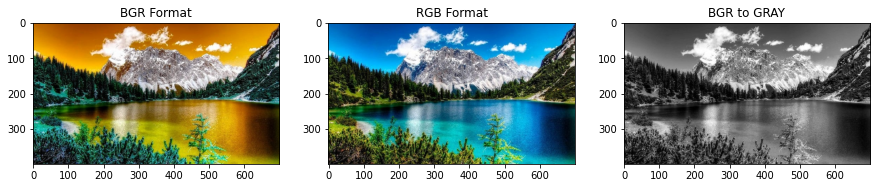

In [ ]:
#function to see image
def imgshow(img=img,img1=img1,img2=img2, rows=1,columns=3):
    print(img.shape,img1.shape,img2.shape)
    fig = plt.figure(figsize=(15,8))
    #adds a subplot at 1st position
    fig.add_subplot(rows,columns,1)
    plt.title('BGR Format')
    plt.imshow(img)

    #adds a subplot at 2nd position
    fig.add_subplot(rows,columns,2)
    plt.title('RGB Format')
    plt.imshow(img1)

    #adds a subplot at 3rd position
    fig.add_subplot(rows,columns, 3)
    plt.title('BGR to GRAY')
    plt.imshow(img2,cmap="gray")
    plt.show()

imgshow(img=img,img1=img1,img2=img2, rows=1,columns=3)

## Erosion <a class="anchor" id="erosion" ></a>

Erosin primarily involves eroding(thinning) outer surface(foreground) of image
- Tt is suggested to have foreground as white

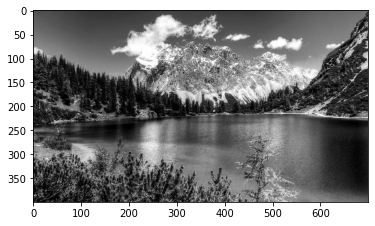

In [ ]:
BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(BGR2GRAY,cmap="gray")
plt.show()

Eroding boundy of image upto 3 level

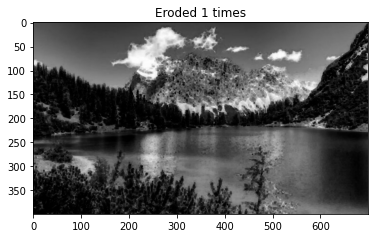

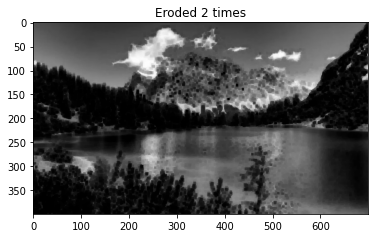

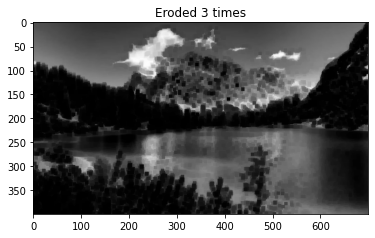

In [ ]:
def plt_imshow(title, image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

for i in range(0,3):
    eroded = cv2.erode(BGR2GRAY.copy(), None, iterations=i+1)
    plt_imshow("Eroded {} times".format(i+1), eroded)

### Binarize Image

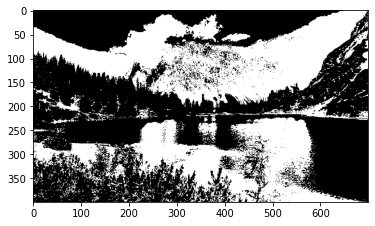

In [ ]:
binr = cv2.threshold(BGR2GRAY, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
image = cv2.cvtColor(binr, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

### We can Invert Image to keep foreground in white

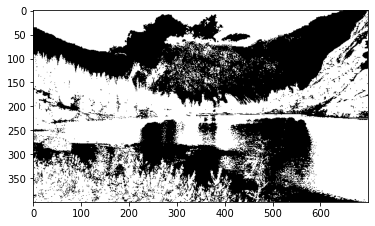

In [ ]:
invert = cv2.bitwise_not(binr)
image = cv2.cvtColor(invert, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

Then, we can define a kernel of $5 \times 5$ to use in erosion

In [ ]:
kernel = np.ones((5,5), np.uint8) #check for 3*3 or 7*7 kernel size too
print(kernel)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


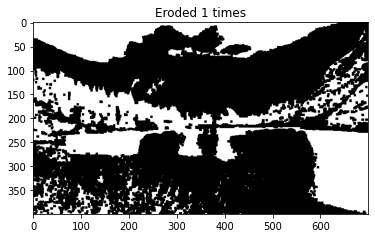

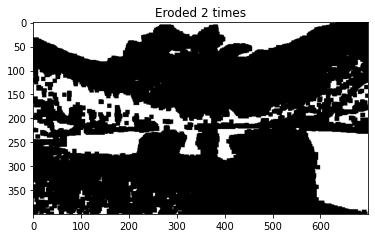

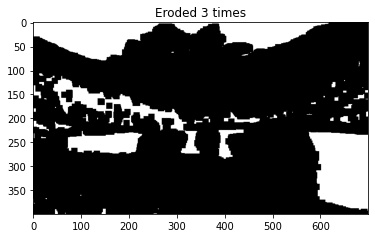

In [ ]:
for i in range(0,3):
    eroded = cv2.erode(invert.copy(),kernel=kernel, iterations=i+1)
    plt_imshow("Eroded {} times".format(i+1), eroded)

## Dilation <a class="anchor" id="dilation" ></a>

Involves dilating outer surface (foreground) of image
- For joining broken parts of an image together

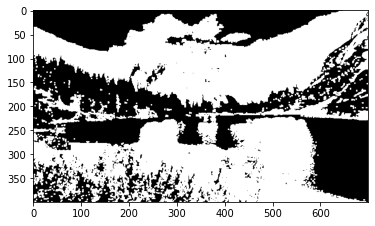

In [ ]:
#binarize image
binr = cv2.threshold(BGR2GRAY,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
kernel = np.ones((3,3),np.uint8)
invert = cv2.bitwise_not(binr)

#dilate image
dilation = cv2.dilate(binr, kernel, iterations=1)

plt.imshow(dilation, cmap='gray')
plt.show()

We can apply series of dilations on inverted image using no kernel


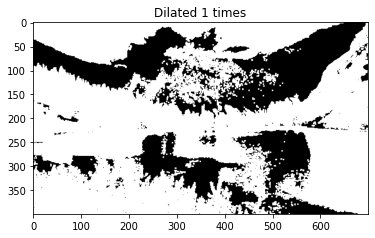

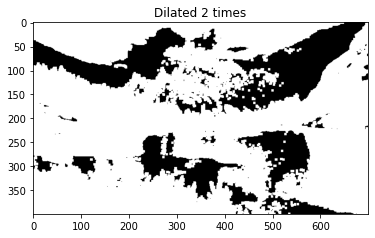

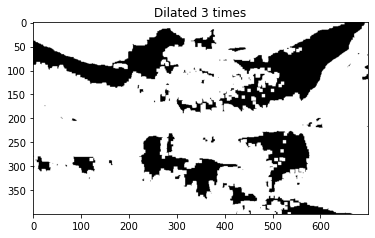

In [ ]:
for i in range(0,3):
    dilated = cv2.dilate(invert.copy(),None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),dilated)

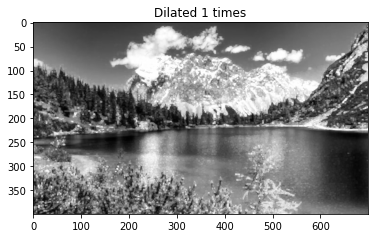

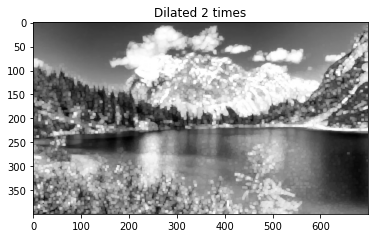

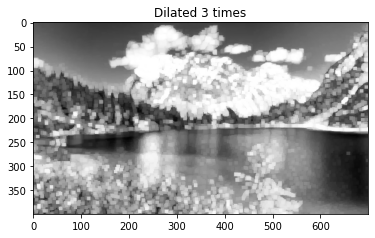

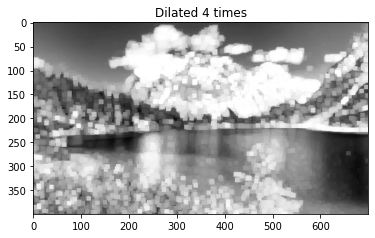

In [ ]:
for i in range(0,4):
    dilated = cv2.dilate(BGR2GRAY.copy(),None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),dilated)

## Opening <a class="anchor" id="opening" ></a>

Erosion followed by dilation in outer surface (foreground) of image
- Generally used to remove noise (small blobs) in image


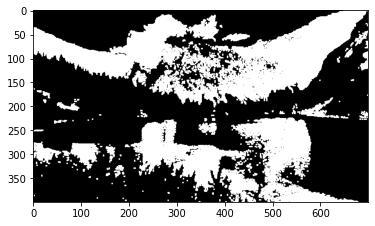

In [ ]:
#opening image
opening = cv2.morphologyEx(binr,cv2.MORPH_OPEN,kernel,iterations=1)

#print output
plt.imshow(opening, cmap='gray')
plt.show()

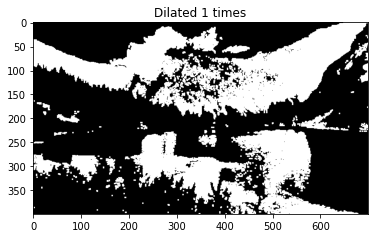

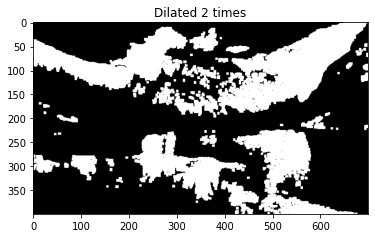

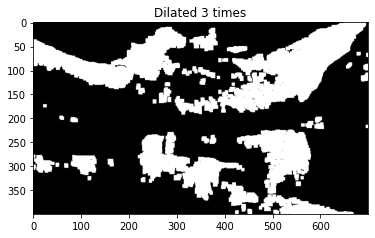

In [ ]:
for i in range(0,3):
    opening = cv2.morphologyEx(binr.copy(),cv2.MORPH_OPEN,None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),opening)
    plt.show()

## Closing <a class="anchor" id="closing" ></a>

Dilation followed by erosion in outer surface (foreground) of image
- Generally used to close holes inside of objects or for connecting components together

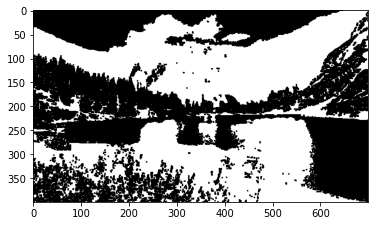

In [ ]:
#closing image
closing = cv2.morphologyEx(binr, cv2.MORPH_CLOSE, kernel, iterations=1)

#print output
plt.imshow(closing,cmap='gray')
plt.show()

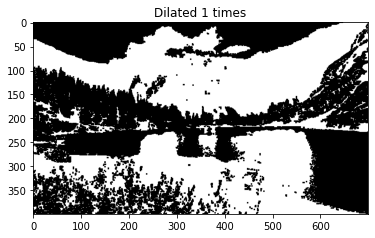

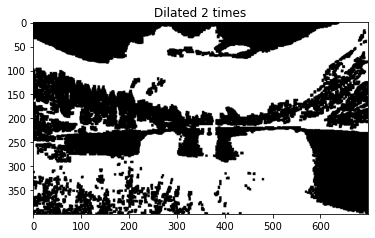

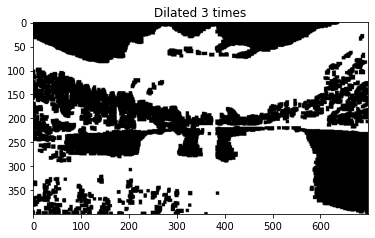

In [ ]:
for i in range(0,3):
    closing = cv2.morphologyEx(binr.copy(),cv2.MORPH_CLOSE,None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),closing)
    plt.show()

Iterating with different kernels

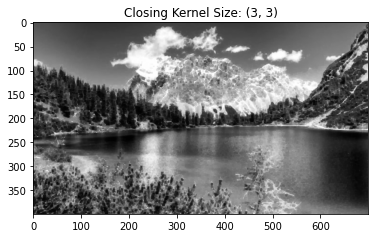

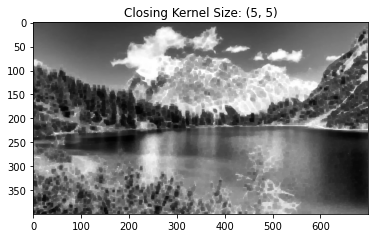

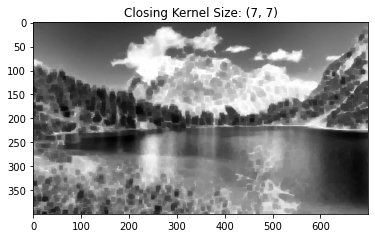

In [ ]:
kernelSizes = [(3,3), (5,5), (7,7)]
BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

for kernelSize in kernelSizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    closing = cv2.morphologyEx(BGR2GRAY, cv2.MORPH_CLOSE, kernel)
    plt_imshow("Closing Kernel Size: ({}, {})".format(kernelSize[0], kernelSize[1]), closing)

## Morphological Gradient <a class="anchor" id="gradient" ></a>

It first applies erosion and dilation individually on image and then computes difference between eroded and dilated image

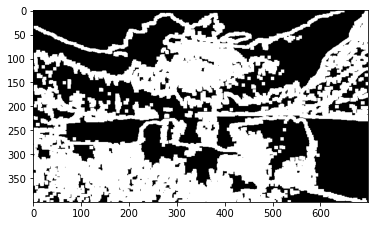

In [ ]:
# use morph gradient
morph_gradient = cv2.morphologyEx(invert,cv2.MORPH_GRADIENT,kernel)

#print output
plt.imshow(morph_gradient, cmap='gray')
plt.show()

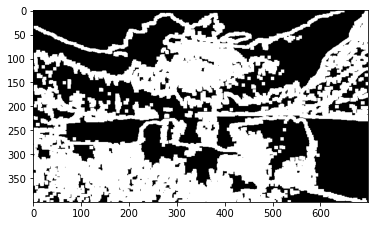

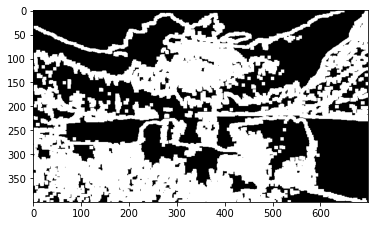

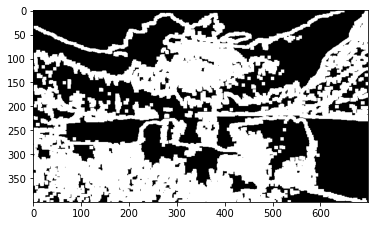

In [ ]:
for i in range(0,3):
    # use morph gradient
    morph_gradient = cv2.morphologyEx(invert,cv2.MORPH_GRADIENT,kernel+i)
    #print output
    plt.imshow(morph_gradient, cmap='gray')
    plt.show()

Iterating with different kernels

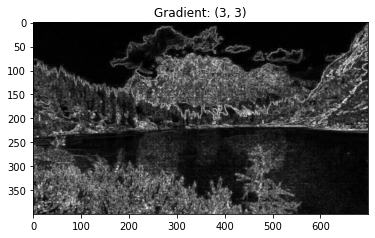

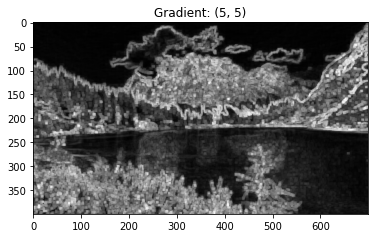

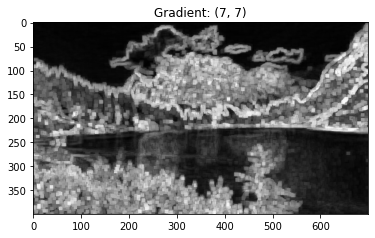

In [ ]:
kernelSizes = [(3,3), (5,5), (7,7)]
BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

for kernelSize in kernelSizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    gradient = cv2.morphologyEx(BGR2GRAY, cv2.MORPH_GRADIENT, kernel)
    plt_imshow("Gradient: ({}, {})".format(
        kernelSize[0], kernelSize[1]), gradient)

## Morphological Hats <a class="anchor" id="hats" ></a>

1. Top or White Hat
2. Black hat

### Top or White Hat <a class="anchor" id="top" ></a>

It is the difference between original (grayscale/single channel) input image and opening image

- Finds light(bright) regions of an image on dark background


In [ ]:
#construct a kernel (13x5)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(13,5))
kernel

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

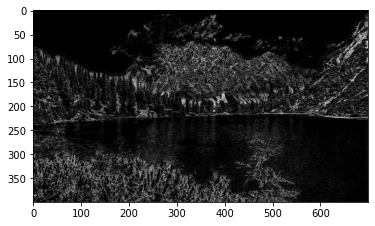

In [ ]:
tophat = cv2.morphologyEx(BGR2GRAY, cv2.MORPH_TOPHAT, kernel)

plt.imshow(tophat, cmap='gray')
plt.show()

### Black Hat <a class="anchor" id="black" ></a>

Output is a difference between input image & opened image
- Finds dark regions on a light background


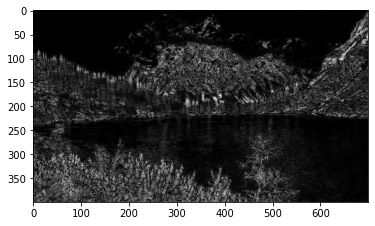

In [ ]:
blackhat = cv2.morphologyEx(BGR2GRAY,cv2.MORPH_BLACKHAT,kernel)

plt.imshow(blackhat, cmap='gray')
plt.show()

### Actividad 4.2 Algoritmos de mejoramiento de imágenes usando operaciones morfológicas

In [ ]:
from scipy.ndimage import binary_erosion, binary_dilation
from skimage import io, color

In [ ]:
# Función para aplicar los procesos de erosión, dilatación, opening y closing de una imagen

def MorfoProcess(input_image, kernel_size, threshold):
  # Convertir la imagen a formato binario (umbralizar)
  binary_image = (input_image > threshold).astype(np.uint8)

  # Definir el elemento estructurante (en este caso, un cuadrado de 3x3)
  structuring_element = np.ones((kernel_size, kernel_size), dtype=np.uint8)

  # Aplicar el proceso de erosión
  eroded_image = binary_erosion(binary_image, structuring_element)

  # Aplicar el proceso de dilatación
  dilated_image = binary_dilation(binary_image, structuring_element)

  # Aplicar el proceso de opening
  opened_image = binary_dilation(binary_erosion(binary_image, structuring_element), structuring_element)

  # Aplicar el proceso de closing
  closed_image = binary_erosion(binary_dilation(binary_image, structuring_element), structuring_element)

  return binary_image, eroded_image, dilated_image, opened_image, closed_image

In [ ]:
# Cargar una imagen en escala de grises
image_path = "/content/skull.jpg"
input_image = io.imread(image_path, as_gray=True)

# Aplicación de los procesos de imagen de binarización, erosión, dilatación, opening y closing
kernel_size = 3
binary_threshold = 0.2
binary_image, eroded_image, dilated_image, opened_image, closed_image = MorfoProcess(input_image, kernel_size, binary_threshold)

a) Investigar una aplicación de erosión en procesamiento de imágenes e implementarlo en Colab

Erosión es un tipo de operación morfológica aplicada a imágenes binarias y en escala de grises donde, de manera similar al filtrado en el dominio espacial, el elemento que realiza la función de filtro se mueve a través de cada pixel en la imagen original en una nueva imagen procesada con un número de pixeles removido en los límites circundantes del objeto filtrado.

Los valores de los pixeles de salida se calculan por medio de la siguiente expresión:

>Pixel (output) = 1 {if FIT}

>Pixel (output) = 0 {otherwise}

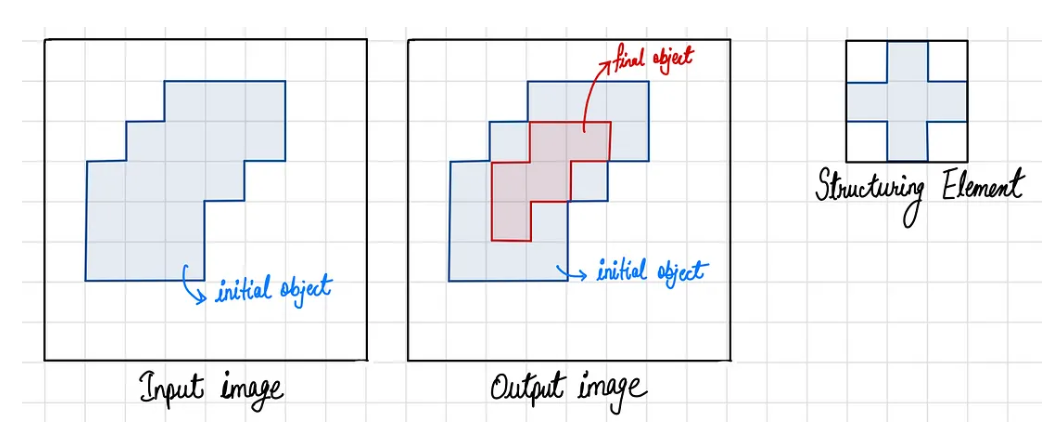

Imagen tomada de Chhikara (2022), https://towardsdatascience.com/understanding-morphological-image-processing-and-its-operations-7bcf1ed11756


Esta técnica es útil para remover pequeñas manchas en una imagen o para desconectar dos objetos que están juntos para poder procesar imágenes de manera aislada de su entorno.

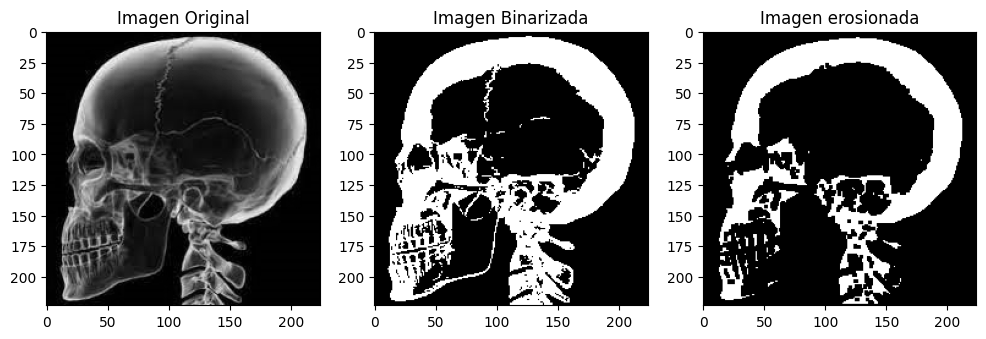

In [ ]:
# Mostrar la imagen original, binarizada y erosionada
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(input_image, cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 3, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Imagen Binarizada')

plt.subplot(1, 3, 3)
plt.imshow(eroded_image, cmap='gray')
plt.title('Imagen erosionada')

plt.show()

b) Investigar una aplicación de dilatación en procesamiento de imágenes e implementarlo en Colab

La técnica de la dilatación añade píxeles a los límites de los objetos de una imagen. El número de píxeles que se añade en los objetos de una imagen depende del tamaño y la forma del elemento estructurante que se utiliza para procesar la imagen (MathWorks España, s. f.).

Para llevar a cabo la dilatación la regla utilizada es la siguiente:

* El valor del píxel de salida es el valor máximo de todos los píxeles del entorno. En una imagen binaria, un píxel se establece en 1 si cualquiera de los píxeles del entorno tiene el valor 1.

* La dilatación morfológica hace que los objetos sean más visibles y rellena los pequeños huecos de los objetos. Las líneas parecen más gruesas y las formas rellenas parecen más grandes.

Algunas de las aplicaciones de la dilatación son las siguientes:

* Imágenes Binarias:

La dilatación en imágenes binarias es comúnmente utilizada para conectar regiones y mejorar la representación de objetos.

* Imágenes en Escala de Grises:

La dilatación en imágenes en escala de grises se puede utilizar para resaltar bordes, eliminar ruido o mejorar ciertas características.

* Imágenes Médicas:

Imágenes tomográficas, resonancias magnéticas u otras imágenes médicas. La dilatación puede ser aplicada para mejorar la segmentación de estructuras anatómicas o para resaltar características de interés.

* Imágenes de Microscopía:

Imágenes obtenidas a través de microscopios, como en biología celular o ciencias de materiales. La dilatación puede ayudar en la mejora de detalles y la segmentación de estructuras.

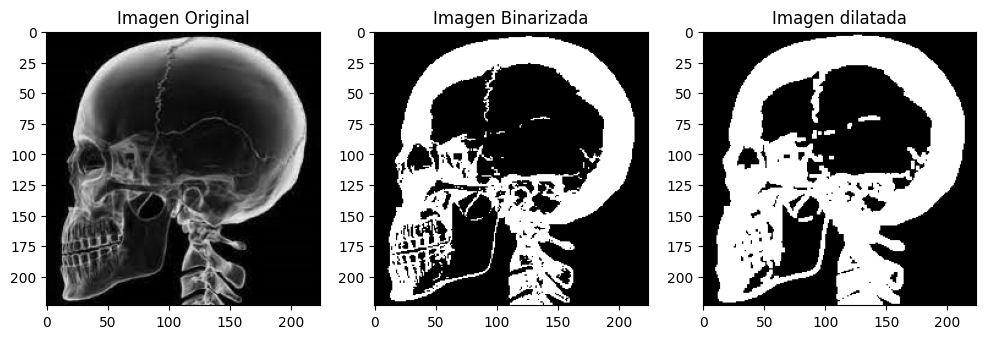

In [ ]:
# Mostrar la imagen original, binarizada y dilatada
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(input_image, cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 3, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Imagen Binarizada')

plt.subplot(1, 3, 3)
plt.imshow(dilated_image, cmap='gray')
plt.title('Imagen dilatada')

plt.show()

En la imagen podemos apreciar como los bordes se vuelven más gruesos y ciertas regiones que hacian falta completar del cuello se dilatan.

In [ ]:
def binaryDilatationProcess(input_image, kernel_size, threshold):
    # Convertir la imagen a formato binario (umbralizar)
    binary_image = (input_image > threshold).astype(np.uint8)
    # Definir el elemento estructurante (en este caso, un cuadrado de 3x3)
    structuring_element = np.ones((kernel_size, kernel_size), dtype=np.uint8)
    # Aplicar el proceso de dilatación
    dilated_image = binary_dilation(binary_image, structuring_element)
    return binary_image, dilated_image

In [ ]:
# Cargar una imagen en escala de grises
image_path = "data/etm-p17-pi1-w4-x5.jpg"
input_image = io.imread(image_path, as_gray=True)
#input_image = None

# Aplicación de los procesos de imagen de binarización y dilatación
kernel_size = 3
binary_threshold = 0.2
binary_image, dilated_image = binaryDilatationProcess(input_image, kernel_size, binary_threshold)

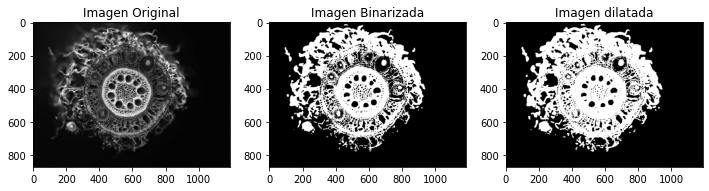

In [ ]:
# Mostrar la imagen original, binarizada y dilatada
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(input_image, cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 3, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Imagen Binarizada')

plt.subplot(1, 3, 3)
plt.imshow(dilated_image, cmap='gray')
plt.title('Imagen dilatada')

plt.show()

Para este caso, la aplicación se lleva a cabo en una imagen microscopica cuyos detalles exteriores son demasiado finos para poder ser apreciados a simple vista, sin embargo, utilizando la tecnica de binarización y posterior la dilatación podemos observar el incremento en el nivel de los detalles exteriores.

c) Investigar una aplicación de opening y closing

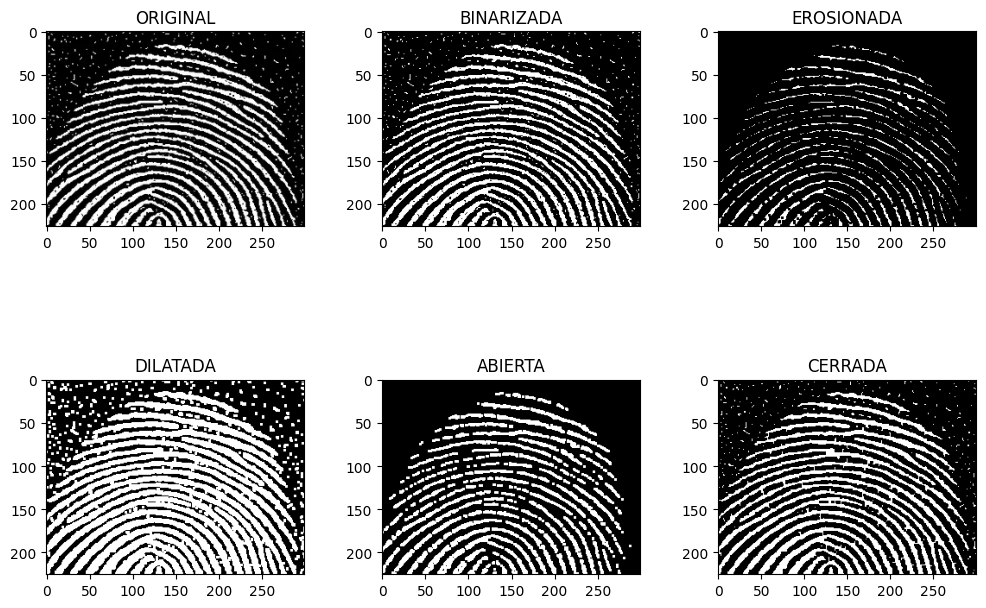

In [ ]:
def show_morphological_results(images, titles, figsize=(12, 8)):

    num_images = len(images)

    fig, axs = plt.subplots(2, num_images // 2, figsize=figsize)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for ax, title, img in zip(axs.flatten(), titles, images):
        ax.imshow(img, cmap='gray')
        ax.set_title(title)

    plt.show()

# Cargar la imagen
image_path = "/content/fingerprint.jpg"
input_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Binarizar la imagen
_, binary_image = cv2.threshold(input_image, 127, 255, cv2.THRESH_BINARY)

# Definir el kernel
kernel = np.ones((3, 3), np.uint8)

# Aplicar operaciones morfológicas
eroded_image = cv2.erode(binary_image, kernel, iterations=1)
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)
opened_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel, iterations=1)
closed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel, iterations=1)

# Mostrar los resultados
images = [input_image, binary_image, eroded_image, dilated_image, opened_image, closed_image]
titles = ['ORIGINAL', 'BINARIZADA', 'EROSIONADA', 'DILATADA', 'ABIERTA', 'CERRADA']

show_morphological_results(images, titles)

# Opening:

La operación de Opening erosiona una imagen y luego dilata la imagen erosionada, utilizando el mismo elemento de estructuración para ambas operaciones.

La dilatación aumenta el tamaño de una imagen, mientras que la erosión lo disminuye. Abrir una imagen suaviza su contorno, fractura
los istmos estrechos y elimina los salientes finos en general.
AB significa Erosión seguida de Dilatación, y se refiere a la apertura de una imagen "A" por un elemento estructural "B".

* A ○ B = (A Θ B) ⊕ B

Se utiliza para eliminar objetos pequeños y líneas delgadas de una imagen mientras se preserva la forma y el tamaño de los objetos más grandes de la imagen.



# Closing

Se utiliza para suavizar y mejorar la conectividad de los objetos en una imagen. Este proceso combina dos operaciones fundamentales: la dilatación seguida de la erosión. En la dilatación, los píxeles del objeto se expanden hacia el entorno, mientras que en la erosión, los píxeles se contraen. Al aplicar la dilatación seguida de la erosión, el closing tiene el efecto de cerrar pequeños huecos en el interior del objeto y suavizar sus contornos.

La aplicación de la operación de closing a una imagen de huella digital generó resultados positivos al cerrar pequeños huecos y detalles superfluos, mejorando así la coherencia y la representación general de la huella. No obstante, se observó que la operación de opening proporcionó beneficios aún mayores al suavizar los contornos y, lo que es más importante, reducir significativamente el ruido presente en la imagen

## Referencias

MathWorks España, (s. f.) Tipos de operaciones morfológicas - MATLAB & Simulink. . Consultado el 01 de febrero de 2024 en https://es.mathworks.com/help/images/morphological-dilation-and-erosion.html